## Download data  

In [ ]:
!gdown --id 1bFx6uiQV-GUGwL3PwYRIYdmRCF9hS2bP

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1bFx6uiQV-GUGwL3PwYRIYdmRCF9hS2bP
To: /content/FER-2013.zip
100% 63.3M/63.3M [00:01<00:00, 43.6MB/s]


## Giải nén data

In [ ]:
!unzip -q "/content/FER-2013.zip"

## Load và xử lý data dạng ảnh 

### Cách xử lý data dùng image_dataset_from_directory

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

In [ ]:
batch_size = 256
img_height = 48
img_width = 48
train_dir = "/content/train" 
test_dir = "/content/test"   

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode="grayscale")

Found 28709 files belonging to 7 classes.
Using 22968 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode="grayscale")

Found 28709 files belonging to 7 classes.
Using 5741 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


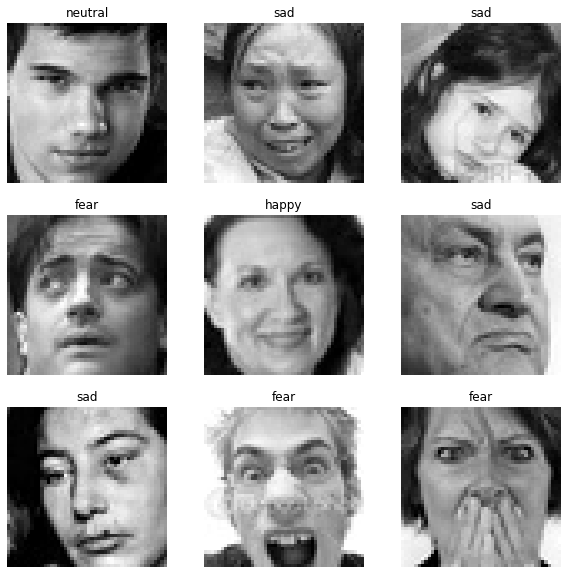

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(np.squeeze(images[i].numpy()).astype("uint8"), cmap="gray")
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
normalized_train_ds = train_ds.map(lambda x, y: (tf.subtract(tf.divide(x, 127.5),1), y))
normalized_val_ds = val_ds.map(lambda x, y: (tf.subtract(tf.divide(x, 127.5),1), y))

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(buffer_size=512).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalized_train_ds = normalized_train_ds.cache().shuffle(buffer_size=512).prefetch(buffer_size=AUTOTUNE)
normalized_val_ds = normalized_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### Sử dụng Tensorflow để  build, compile và train và evaluate model. Kết quả train và evaluation được thể hiện bằng hình ảnh bằng cách sử dụng matplotlib 

##### MLP - relu

In [ ]:
num_class = 7

######################### YOUR CODE HERE #########################
# Sử dụng tf.keras.Sequential để thiết kế model theo yêu cầu đề  bài 
MLP_relu_model = tf.keras.Sequential([
    # Flaten layer: input shape = (48,48,1)

    # Hidden layer 1: 1024 nodes, activation = relu

    # Hidden layer 2: 512 nodes, activation = relu

    # Hidden layer 3: 256 nodes, activation = relu

    # Output layer: 7 nodes (num_class)
])
##################################################################
MLP_relu_model.summary()
#
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
opt = tf.keras.optimizers.SGD(learning_rate=0.006)
# metric = tf.keras.metrics.SparseCategoricalAccuracy()
MLP_relu_model.compile(optimizer=opt,loss=loss, metrics=['accuracy'])

#
MLP_relu_history = MLP_relu_model.fit(normalized_train_ds, validation_data=normalized_val_ds, epochs=100)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              2360320   
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 3,018,247
Trainable params: 3,018,247
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
90/90 [=========================

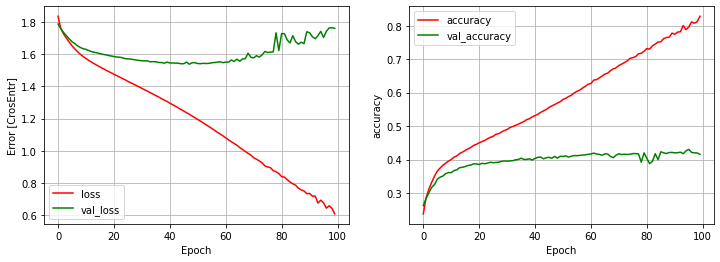

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(MLP_relu_history.history['loss'], label='loss', color='red')
plt.plot(MLP_relu_history.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(MLP_relu_history.history['accuracy'], label='accuracy', color='red')
plt.plot(MLP_relu_history.history['val_accuracy'], label='val_accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)


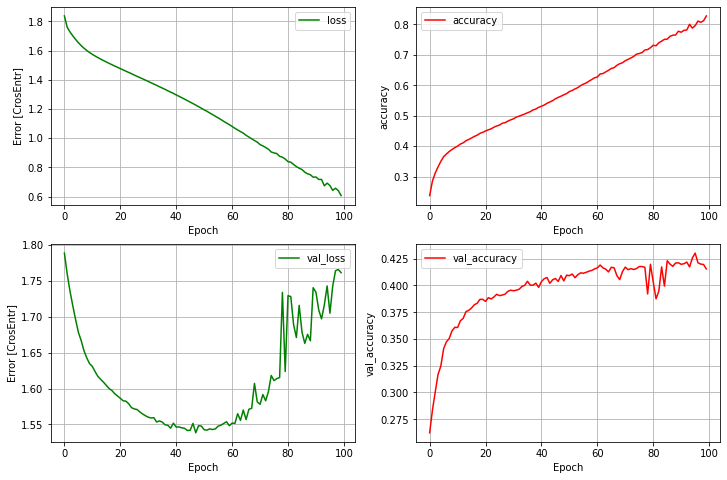

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
plt.plot(MLP_relu_history.history['loss'], label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(MLP_relu_history.history['accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(MLP_relu_history.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(MLP_relu_history.history['val_accuracy'], label='val_accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.grid(True)


In [ ]:
hist = pd.DataFrame(MLP_relu_history.history)
hist['epoch'] = MLP_relu_history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.675652,0.796238,1.705022,0.430239,95
96,0.642725,0.811346,1.743020,0.421181,96
97,0.657370,0.807297,1.764314,0.419962,97
98,0.641088,0.812173,1.765963,0.419613,98
99,0.606809,0.828239,1.761560,0.415433,99


In [ ]:
print("Max train acc: ", max(hist['accuracy']))
print("Max val acc: ", max(hist['val_accuracy']))

print("Min train loss: ", min(hist['loss']))
print("Min val loss: ", min(hist['val_loss']))

Max train acc:  0.8282392621040344
Max val acc:  0.43023863434791565
Min train loss:  0.6068087816238403
Min val loss:  1.5383226871490479
